<a href="https://colab.research.google.com/github/ka-means/Process-Mining-/blob/main/Exploring_an_event_log_with_pm4py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img src="https://web-uc-prod.s3.amazonaws.com/img/logo-uc-chile.svg" alt="logoUC" width="40%" align="right" hspace="10px" vspace="0px"></p>

**Autores:**
* Luciano Hidalgo (lhidalgo1@uc.cl),
* Ignacio Velásquez (iavelasquez@uc.cl)

*Versión Original:*
* Victor Gálvez (vagalvez@uc.cl)


# **EXPLORANDO UN EVENT LOG CON PM4PY**

Para correr este notebook se utilizan dos archivos correspondientes a un mismo log de eventos de Reparación de Vehículos:

* Log de eventos en formato XES: <AGREGAR LINK>
* Log de eventos en formato CSV: <AGREGAR LINK>

Al correr el notebook de manera local, estos archivos deben ser descargados y ubicados en la misma carpeta del notebook. Sin embargo, si nos encontramos trabajando en Google Colab, la siguiente celda permite cargar los archivos directamente a la memoria de la sesión actual de Colab.

In [ ]:
from IPython.display import clear_output


if 'google.colab' in str(get_ipython()):
  # Log de eventos en formato XES
  !gdown --id 12jaCdN3bF8kx2Sq1q86WlWLy5LrDFCeh

  # Log de eventos en formato CSV
  !gdown --id 12fURr7Z835K5v0Pbzz08j0KM8DHO0gVQ

clear_output()
print("Logs 'Reparacion de Vehiculos.xes' y 'Reparacion Vehiculos.csv' cargados.")

## 1. Instalación y Documentación

### PM4Py

Para instalar el módulo se utiliza el comando:

    pip install pm4py

In [ ]:
!pip install pm4py

clear_output()
print("PM4Py instalado.")

### Documentación

En caso de requerir más información para la instalación de PM4Py, se puede acceder al siguiente enlace: https://pm4py.fit.fraunhofer.de/static/assets/api/2.7.8/install.html

La documentación oficial del módulo puede ser encontrada en: https://pm4py.fit.fraunhofer.de/static/assets/api/2.7.8/index.html

El repositorio GitHub del módulo es: https://github.com/pm4py/pm4py-core

## 2. Lectura del Log de Eventos

PM4Py puede leer logs de eventos en formato XES, u obtenerlos desde Dataframes generados por la librería Pandas (para leer logs de eventos en formato CSV):

### Leer XES

In [ ]:
import pm4py

log_xes = pm4py.read_xes('reparacion_vehiculos.xes')

Los logs de eventos en formato XES dividen las actividades en 'Start' y 'Complete' para representar el inicio y fin de cada una.

In [ ]:
log_xes.head()

### Leer CSV

In [ ]:
import pandas as pd

log_csv = pd.read_csv('reparacion_vehiculos.csv', sep = ';')

log_csv = pm4py.format_dataframe(log_csv,
                                case_id='ID Caso',
                                activity_key='Actividad',
                                timestamp_key='Fin',
                                timest_format  = '%Y-%m-%d %H:%M:%S')

In [ ]:
log_csv.head()

# 3. Exploración del *event log*

En esta sección se dará respuesta a algunas de las preguntas frecuentes al momento de analizar un log de eventos.

### ¿Cuántas ejecuciones del proceso (casos) contiene el log de eventos?

Para contestar la pregunta, se puede consultar la cantidad de valores únicos que contiene la columna que contiene el ID de caso:

```python
len(set(log_de_eventos['case:concept:name']))
```

Esto transforma toda la columna CASE ID del log de eventos en un conjunto, lo que elimina las entradas duplicadas.

In [ ]:
print("Cantidad de casos en el log de eventos: " + str(len(set(log_csv['case:concept:name']))))

### ¿Cuáles son las actividades que se realizan más y menos a menudo?

Para contestar la pregunta, se puede obtener un diccionario incluyendo la frecuencia de todas las actividades a través de las funciones de PM4Py:


```python
pm4py.stats.get_event_attribute_values(log_de_eventos, 'concept:name')
```  


In [ ]:
actividades = pm4py.stats.get_event_attribute_values(log_csv, 'concept:name')

actividades

### ¿Cuáles son los ejecutores que participan realizando más y menos actividades?

Para contestar la pregunta, se pueden utilizar nuevamente las funciones de PM4Py, pero esta vez consultando por la columna 'Ejecutor':

```python
pm4py.stats.get_event_attribute_values(log_de_eventos, 'Ejecutor')
```

A continuación se provee una función que hace uso de lo anterior para retornar un Dataframe de Pandas con los ejecutores ordenados de mayor a menor participación.


In [ ]:
ejecutores = pm4py.stats.get_event_attribute_values(log_csv, 'Ejecutor')
ejecutores

### ¿Con qué actividades inicia y termina el proceso?

Para contestar a esta pregunta, el mismo módulo nos provee de dos funciones:



```python
pm4py.stats.get_start_activities(log_de_eventos)
pm4py.stats.get_end_activities(log_de_eventos)
```



La primera nos retorna un diccionario con las actividades de inicio y la segunda con las actividades de fin.

A continuación se proveen funciones que permiten obtenerlas en un formato de Dataframe de Pandas.

In [ ]:
actividades_de_inicio = pm4py.stats.get_start_activities(log_csv)
actividades_de_inicio

In [ ]:
actividades_de_fin = pm4py.stats.get_end_activities(log_csv)
actividades_de_fin

### ¿Cuántas variantes existen?

Para responder esta pregunta pm4py nos provee con la función:

```python
pm4py.stats.get_variants(log_de_eventos)
```
La cuál recibe como entrada un log de eventos y retorna como resultado un diccionario, donde la clave es una tupla, que representa la secuencia de actividades y el valor es la cantidad de veces que aparece dicha variante en el log.


In [ ]:
variantes = pm4py.stats.get_variants(log_csv)
variantes

Si quisiéramos saber cuantas variantes hay, podemos preguntar por el largo del diccionario:

```python
len(pm4py.stats.get_variants(event_log))
```


In [ ]:
cant_variantes = len(pm4py.stats.get_variants(log_csv))
print('El event log cuenta con', cant_variantes, 'variantes')

Como la función anterior retorna las variantes desordenadas, si quisiéramos responder cuáles son las *n* variantes más comunes, bastaría con ordenar de mayor a menor.

In [ ]:
# Convierto a tipo de dato list, el cuál permite ordenarse
list_variantes = list(variantes.items())
# Ordeno las variantes
list_variantes.sort(key = lambda x: x[1], reverse=True)

# Mostraré las 5 más comunes
for var in list_variantes[0:5]:
  print(var)

### ¿Cuál es la duración (promedio y mediana) de los casos?

Para contestar la pregunta, se puede obtener la duración de cada uno de los casos del log de eventos a través de las funciones de PM4Py:

    
```python
duraciones_casos = pm4py.stats.get_all_case_durations(log_de_eventos)
```
Esto retorna una lista de duraciones (en segundos). Luego, se pueden utilizar funcionalidades del módulo Numpy para obtener el promedio o la mediana.

In [ ]:
duraciones_casos = pm4py.stats.get_all_case_durations(log_csv)
duraciones_casos

In [ ]:
import numpy as np

duracion_promedio = round(np.mean(duraciones_casos))

duracion_mediana = round(np.median(duraciones_casos))

print('Promedio de duración de los casos:', duracion_promedio)
print('Mediana de duración de los casos:', duracion_mediana)

También es posible generar un gráfico que permita observar la distribución de casos según su duración. Para ello pm4py cuenta con la función:


```
pm4py.view_case_duration_graph(log_de_eventos)
```

La que nos entrega esta distribución.

In [ ]:
pm4py.view_case_duration_graph(log_csv)

### ¿Cuál es la distribución de eventos en el tiempo?

También es posible generar un gráfico que permita observar la distribución de eventos en el tiempo. Para ello pm4py cuenta con la función:

```
pm4py.view_events_per_time_graph(log_de_eventos)
```

La que nos entrega esta distribución.

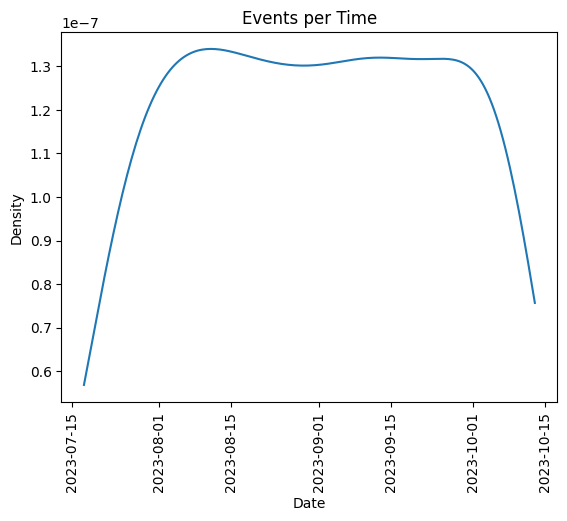

In [47]:
pm4py.view_events_per_time_graph(log_csv)

# 4. Filtrado

Del ejemplo, es posible ver que cuando obtuvimos las actividades de fin, pese a que el proceso siempre debería terminar en "Entregar vehiculo", en varios casos existen otras actividades de fin.

En este caso, podemos asumir que estas actividades representan casos incompletos y podemos filtrarlos para evitar que generen problemas en análisis futuros.


In [48]:
# Recordemos las actividades
actividades_de_fin = pm4py.stats.get_end_activities(log_csv)
actividades_de_fin

{'Entregar vehiculo': 783,
 'Probar vehiculo': 23,
 'Recibir repuestos': 72,
 'Instalar repuestos': 5,
 'Restaurar danos': 6,
 'Comprar repuestos': 19,
 'Coordinar retiro': 7,
 'Recibir respuesta': 10,
 'Enviar presupuesto a cliente': 13}

Usando la función:


```python
pm4py.filtering.filter_end_activities(log_de_eventos,
                                      actividades_de_fin_permitidas)
```

Dejaremos solo los casos que terminen con las actividades señaladas en la lista.


In [49]:
log_filtrado = pm4py.filtering.filter_end_activities(log_csv, ['Entregar vehiculo'])

Ahora podemos ver que solo tenemos casos que terminan con "Entregar vehículo" en el *event log*:

In [50]:
actividades_de_fin = pm4py.stats.get_end_activities(log_filtrado)
actividades_de_fin

{'Entregar vehiculo': 783}

Esto reduce el número de casos de 938 a 783 y también el número de variantes, como podemos ver a continuación:

In [51]:
len(pm4py.stats.get_variants(log_filtrado))

34

Existen otros filtros útiles, los cuáles si bien están fuera del alcance de este tutorial, valen la pena mencionar.

Por ejemplo, si queremos filtrar por actividad de inicio, podemos usar la función `filter_start_activities(log, actividades)` con la misma sintaxis que la función anterior.

```python
pm4py.filtering.filter_start_activities(log_de_eventos,
                                      actividades_de_fin_permitidas)
```

Del mismo modo, se puede filtrar por otros elementos, para ello se usa principalmente la función `filter_event_attribute_values`.


```
pm4py.filtering.filter_event_attribute_values(log_de_eventos,
                                              attribute_key (columna),
                                              values (valores),
                                              retain (quitar los valores mencionados o quitar todos los demás),
                                              level (event o case)
                                              )
```



Esta nos permite filtrar casos por cualquier columna en la tabla. Esta función recibe 5 parámetros:

* El *event log* a filtrar (DataFrame).
* El nombre de la columna sobre la cual quiero realizar el filtrado (str).
* Los valores que quiero filtrar (list).
* Un valor retain, el cuál indica si el filtro es para remover los valores de values (Si es True) o si quiero sacar todos los valores que no son iguales a los de la lista values (Si fuese False).
* Un string para indicar si el filtro se aplica a nivel de eventos (actividades) o sobre el caso completo.

Para ilustrarlo quitaremos, sobre el log ya filtrado, todos los casos en los que no participó el ejecutor de nombre "Alejandro".


In [52]:
casos_sin_alejandro = pm4py.filtering.filter_event_attribute_values(log_filtrado,
                                              attribute_key = 'Ejecutor',
                                              values = ['Alejandro'],
                                              retain = False,
                                              level = 'case'
                                              )

En este caso usamos la columna "Ejecutor", para filtrar al ejecutor "Alejandro". El retain fue marcado como False para quedarnos solo con los casos sin él y el filtro fue aplicado a nivel de caso, para quedarnos con todos los casos en los que Alejandro no aparece.

Podemos ver que el log nuevo no tiene a Alejandro entre los ejecutores:

In [53]:
set(casos_sin_alejandro['Ejecutor'])

{'Arturo',
 'Bernardo',
 'Daniela',
 'Gabriela',
 'Isabel',
 'Jose',
 'Mario',
 'Norma',
 'Pablo',
 'Pedro',
 'Roberto',
 'Victor',
 'Violeta'}

Y que quedan 700 casos.

In [54]:
len(set(casos_sin_alejandro['case:concept:name']))

700

Finalmente, sin en cambio hubiésemos querido quitar solo las actividades en las que participó Alejandro, pero no los casos completos, bastaría con modificar el atributo `level` de `'case'` a `'event'`.


In [55]:
eventos_sin_alejandro = pm4py.filtering.filter_event_attribute_values(log_filtrado,
                                              attribute_key = 'Ejecutor',
                                              values = ['Alejandro'],
                                              retain = False,
                                              level = 'event'
                                              )

Como podemos ver, al aplicar este filtro, mantenemos la totalidad de los casos.

In [56]:
len(set(eventos_sin_alejandro['case:concept:name']))

783

Pero Alejandro sigue sin ser parte de la lista de ejecutores:

In [57]:
set(casos_sin_alejandro['Ejecutor'])

{'Arturo',
 'Bernardo',
 'Daniela',
 'Gabriela',
 'Isabel',
 'Jose',
 'Mario',
 'Norma',
 'Pablo',
 'Pedro',
 'Roberto',
 'Victor',
 'Violeta'}

Existen otros filtros interesantes en pm4py, como por ejemplo filtros por duración, por período de tiempo, o por variante.

Si deseas conocer más, visita la documentación oficial de pm4py: https://pm4py.fit.fraunhofer.de/static/assets/api/2.7.8/api.html#filtering-pm4py-filtering
